## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy import stats

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset and display for preview

mouse_study = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID"])
mouse_study.head()



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Check number of rows
mouse_study.count()

Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [3]:
# Checking the number of mice using the'mouse id' column and look for discrepencies

mouse_study['Mouse ID'].value_counts()


g989    13
k403    10
j365    10
j984    10
k210    10
        ..
v199     1
t573     1
f932     1
b447     1
u153     1
Name: Mouse ID, Length: 249, dtype: int64

In [8]:
# Get all the data for the duplicate mouse ID. 

index_mouse_study = mouse_study.set_index('Mouse ID')
index_mouse_study.loc['g989']

mouse_study_clean = index_mouse_study.drop("g989")
mouse_study_clean.count()

Drug Regimen          1880
Sex                   1880
Age_months            1880
Weight (g)            1880
Timepoint             1880
Tumor Volume (mm3)    1880
Metastatic Sites      1880
dtype: int64

In [9]:

mouse_study_clean

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
k403,Ramicane,Male,21,16,0,45.000000,0
k403,Ramicane,Male,21,16,5,38.825898,0
k403,Ramicane,Male,21,16,10,35.014271,1
k403,Ramicane,Male,21,16,15,34.223992,1
k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...
z969,Naftisol,Male,9,30,25,63.145652,2
z969,Naftisol,Male,9,30,30,65.841013,3
z969,Naftisol,Male,9,30,35,69.176246,4


## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.


drug_study = mouse_study_clean.groupby("Drug Regimen")

tumor_mean = drug_study["Tumor Volume (mm3)"].mean()
tumor_median = drug_study["Tumor Volume (mm3)"].median()
tumor_var = drug_study["Tumor Volume (mm3)"].var()
tumor_std = drug_study["Tumor Volume (mm3)"].std()
tumor_sem = drug_study["Tumor Volume (mm3)"].sem()

summary_stats = pd.DataFrame({"Mean": tumor_mean,
                              "Median": tumor_median,
                              "Variance": tumor_var,
                              "Standard Deviation": tumor_std,
                              "Standard Error of the Mean": tumor_sem})

summary_stats



,Mean,Median,Variance,Standard Deviation,Standard Error of the Mean
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, 'Number of Timepoints')

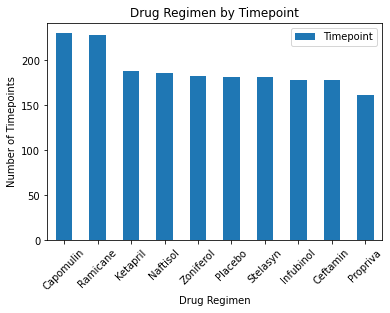

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.


number_of_timepoints = mouse_study['Drug Regimen'].value_counts()

#number_of_timepoints = mouse_study_clean.groupby(['Drug Regimen'])['Timepoint'].count()

drug_study_one = pd.DataFrame({'Timepoint': number_of_timepoints})

# Chart the data, give it a title, and label the axes
drug_chart = drug_study_one.plot(kind="bar", title="Drug Regimen by Timepoint",rot=45)
drug_chart.set_xlabel("Drug Regimen")
drug_chart.set_ylabel("Number of Timepoints")



In [12]:
drug_study_one

,Timepoint
Capomulin,230
Ramicane,228
Ketapril,188
Naftisol,186
Zoniferol,182
Placebo,181
Stelasyn,181
Infubinol,178
Ceftamin,178
Propriva,161


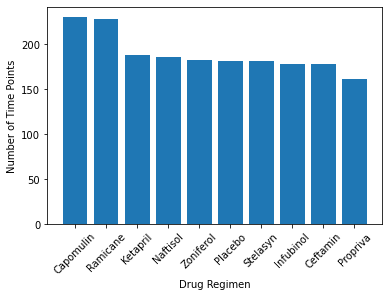

In [13]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using 
# Mathplotlib - pyplot.

x_axis = mouse_study_clean["Drug Regimen"].value_counts().index
y_axis = number_of_timepoints
plt.bar(x_axis, y_axis)
plt.xticks(rotation=45)
plt.ylabel("Number of Time Points")
plt.xlabel("Drug Regimen")
plt.show()


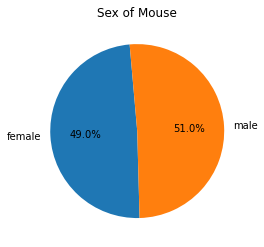

In [20]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

gender_study = mouse_study_clean.groupby(['Sex'])['Sex'].count()
plt.pie(gender_study, labels=('female', 'male'), startangle=95, autopct='%1.1f%%')
plt.title("Sex of Mouse")
plt.show()


<AxesSubplot:title={'center':'Sex of Mouse'}, ylabel='Sex'>

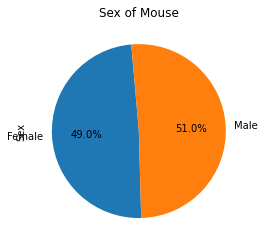

In [23]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# Split up our data into groups based upon 'gender'
#gender_groups = single_mouse_study.groupby('Sex')

gender_study = mouse_study_clean.groupby(['Sex'])['Sex'].count()

gender_study.plot.pie(title = "Sex of Mouse",startangle=95,autopct='%1.1f%%')


## Quartiles, Outliers and Boxplots

In [24]:
# Calculate the final tumor volume of each mouse across four of the top treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Find the max timepoint for each mouse
max_time = pd.DataFrame(mouse_study.groupby('Mouse ID')['Timepoint'].max())
max_time

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
vol_time = pd.merge(max_time, mouse_study_clean, on=('Mouse ID', 'Timepoint'), how='left')

#Delete unnecessary columns
#del grouped_school_spending["Total Students"]
#del grouped_school_spending["Total School Budget"]
#del grouped_school_spending["Per Student Budget"]

vol_time.head()



,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
a203,45,Infubinol,Female,20.0,23.0,67.973419,2.0
a251,45,Infubinol,Female,21.0,25.0,65.525743,1.0
a262,45,Placebo,Female,17.0,29.0,70.717621,4.0
a275,45,Ceftamin,Female,20.0,28.0,62.999356,3.0
a366,30,Stelasyn,Female,16.0,29.0,63.440686,1.0


In [25]:
# Rename the timepoint column and delete any unecessary columns
vol_time = vol_time.rename(columns={"Timepoint": "Max Timepoint"})
vol_time.head(10)

,Max Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
a203,45,Infubinol,Female,20.0,23.0,67.973419,2.0
a251,45,Infubinol,Female,21.0,25.0,65.525743,1.0
a262,45,Placebo,Female,17.0,29.0,70.717621,4.0
a275,45,Ceftamin,Female,20.0,28.0,62.999356,3.0
a366,30,Stelasyn,Female,16.0,29.0,63.440686,1.0
a401,45,Zoniferol,Female,8.0,25.0,66.794156,4.0
a411,45,Ramicane,Male,3.0,22.0,38.407618,1.0
a444,45,Ramicane,Female,10.0,25.0,43.047543,0.0
a457,10,Ketapril,Female,11.0,30.0,49.783419,0.0


In [26]:
vol_time.value_counts()

Max Timepoint  Drug Regimen  Sex     Age_months  Weight (g)  Tumor Volume (mm3)  Metastatic Sites
0              Ceftamin      Female  11.0        25.0        45.000000           0.0                 1
45             Ketapril      Male    22.0        29.0        73.715619           4.0                 1
               Infubinol     Male    8.0         30.0        66.083066           3.0                 1
                                     11.0        28.0        72.226731           2.0                 1
                                     23.0        26.0        60.918767           1.0                 1
                                                                                                    ..
30             Propriva      Female  2.0         28.0        58.406473           1.0                 1
                             Male    8.0         25.0        55.841410           1.0                 1
                                     22.0        25.0        60.008783        

In [203]:
# Put treatments into a list for the for loop (and later for plot labels)

treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
vol_data = []

# Find each drug in the list
# Locate the rows which contain mice on each drug and get the tumor volumes
for x in treatments: 
 
    # Create a series that consists of all final volume values for each regimen
    vol_values = vol_time['Tumor Volume (mm3)']
    vol_data.append(vol_values)
    print(vol_data)
   
    # Calculate and print the interquartile range (IQR) for each regimen
    quartiles = vol_values.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    print(f'IQR for the tumor volume for {x} is {iqr}')

    #Find upper and lower bounds to determine if there are any potential outliers.
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f'Lower Bound for {x}: {lower_bound}')
    print(f'Upper Bound for {x}: {upper_bound}')


    # Determine outliers using upper and lower bounds  - how?????  
    #print(f"Values below {lower_bound} could be outliers.")
    #print(f"Values above {upper_bound} could be outliers.")

    
    
    
    
    
    
    
    
    

[0      67.973419
1      65.525743
2      70.717621
3      62.999356
4      63.440686
         ...    
244    48.710661
245    30.638696
246    62.754451
247    65.741070
248    73.867845
Name: Tumor Volume (mm3), Length: 249, dtype: float64]
IQR for the tumor volume for Capomulin is 19.022849680000007
Lower Bound for Capomulin: 17.400437649999986
Upper Bound for Capomulin: 93.49183637000002
[0      67.973419
1      65.525743
2      70.717621
3      62.999356
4      63.440686
         ...    
244    48.710661
245    30.638696
246    62.754451
247    65.741070
248    73.867845
Name: Tumor Volume (mm3), Length: 249, dtype: float64, 0      67.973419
1      65.525743
2      70.717621
3      62.999356
4      63.440686
         ...    
244    48.710661
245    30.638696
246    62.754451
247    65.741070
248    73.867845
Name: Tumor Volume (mm3), Length: 249, dtype: float64]
IQR for the tumor volume for Ramicane is 19.022849680000007
Lower Bound for Ramicane: 17.400437649999986
Upper Bound for

In [27]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

# Plot boxplot

plt.boxplot(vol_data)

# Add title and labels to boxplot
plt.title('Final Tumor Volume by Drug')
plt.ylabel('Final Tumor Volume (mm3)')
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])

red_square = dict(markerfacecolor='r', marker='s')

plt.show()


NameError: name 'vol_data' is not defined

## Line and Scatter Plots

In [32]:
#Create new data frame for the Capomulin treatment.

capomulin_df = mouse_study_clean.loc[mouse_study_clean["Drug Regimen"] == "Capomulin"]
capomulin_df


,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
s185,Capomulin,Female,3,17,0,45.000000,0
s185,Capomulin,Female,3,17,5,43.878496,0
s185,Capomulin,Female,3,17,10,37.614948,0
s185,Capomulin,Female,3,17,15,38.177232,0
s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...
i557,Capomulin,Female,1,24,45,47.685963,1
r157,Capomulin,Male,22,25,0,45.000000,0
r157,Capomulin,Male,22,25,5,45.597064,0


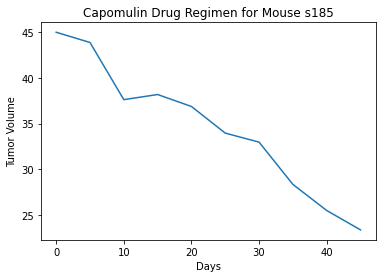

In [45]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# This data is for a 3 month old female mouse with ID s185


line_df = capomulin_df.loc['s185']

timepoint_cap = line_df['Timepoint']
tumor_cap = line_df["Tumor Volume (mm3)"]


values = [[0,50], [0,45]]

plt.plot(timepoint_cap,tumor_cap)
plt.title("Capomulin Drug Regimen for Mouse s185")
plt.xlabel('Days')
plt.ylabel('Tumor Volume')

plt.show()



Text(0, 0.5, 'Tumor Volume (mm3)')

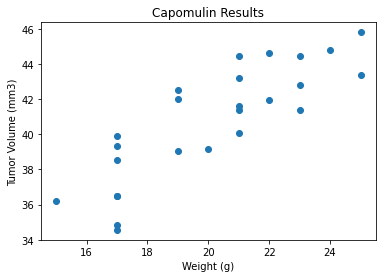

In [47]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

#Not sure if we are doing average volume for each drug.
capomulin_avg = capomulin_df.groupby(['Mouse ID']).mean()

x_values = capomulin_avg["Weight (g)"]
y_values = capomulin_avg["Tumor Volume (mm3)"]
plt.scatter(x_values, y_values)
plt.title("Capomulin Results")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")




## Correlation and Regression

The correlation coefficient r-value is 0.84
y = 0.95x +21.55


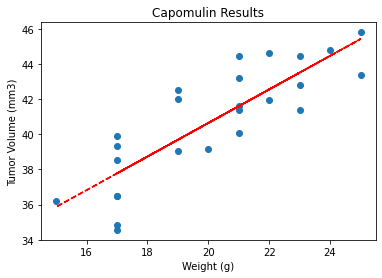

In [48]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = slope * x_values + intercept


correlation = st.pearsonr(x_values, y_values)
print(f"The correlation coefficient r-value is {round(correlation[0],2)}")

#slope, int, r, p, std_err = st.linregress(x_values, y_values)
#regress_values = slope * x_values + int
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "--", color="r")

plt.title("Capomulin Results")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(21,25),fontsize=15,color="red")
print(line_eq)

